# Лабораторная работа по методам оптимизации
### Тема: Применение условий оптимальности Каруша-Куна-Таккера


**Выполнил:** Напылов Евгений 381806-2

# Вариант № 1

Целевая функция:

$Q(x_1, x_2) = 20(cos(3x_1) - x_2)^2 + (x_2 - 4x_1)^2$

Функции-ограничения:

$g_1(x_1, x_2) = x_2 + x_1 - 0.1$

$g_2(x_1, x_2) = -(x_1 - 1)^2 - 2(x_2 - 1)^2 + 5$

$g_3(x_1, x_2) = x_2 - x_1 - 0.25$


##  Построение 3D-модели целевой функции

Построим 3D-модель целевой функции, определим начальное приближение и множество активных ограничений. Для этого нам потребуется библиотека символьных вычислений SymPy (документация лежит здесь https://docs.sympy.org/latest/tutorial/index.html)

In [1]:
from sympy import *
from sympy.plotting import plot3d

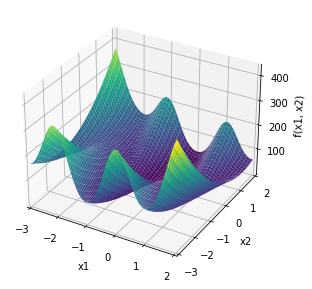

In [2]:
x1, x2 = symbols('x1 x2')

# Целевая функциия

Q = 20 * (cos(3*x1) - x2)**2 + (x2 - 4*x1)**2

# Ограничения

g1 = x2 + x1 - 0.1
g2 = -(x1-1)**2 - 2*(x2-1)**2 + 5
g3 = x2 - x1 - 0.25


# вычисление частных производных по x1

dQ_dx1 = diff(Q, x1)

# отрисовка графика целевой функции

leftBoundaryY  = -3
rightBoundaryY = 2

leftBoundaryX  = -3
rightBoundaryX = 2

plot3d(Q, (x1, leftBoundaryX, rightBoundaryX), (x2, leftBoundaryY , rightBoundaryY))

Проверим, правильно ли вычислена производная

In [3]:
print(dQ_dx1)

32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1)


Построим линии уровня целевой функции и ограничений. Попробуем проанализировать, где может быть локальный минимум. Обратите внимание, что  минимумов может быть несколько.

In [4]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as opt
import sympy as sp

C:\Users\veter\AppData\Local\Temp/ipykernel_6328/830420006.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)


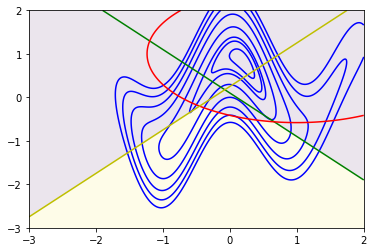

In [5]:
import numpy
plt.figure()
a = numpy.linspace(-3, 2, 1000)
b = numpy.linspace(-3, 2, 1000)

x, y = numpy.meshgrid(a, b)

f_q = lambdify((x1, x2), Q, 'numpy')

f_g1 = lambdify((x1, x2), g1, 'numpy')
f_g2 = lambdify((x1, x2), g2, 'numpy')
f_g3 = lambdify((x1, x2), g3, 'numpy')

plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)

c = plt.contour(x, y, f_q(x, y), levels=(1, 3, 4.5, 10, 20, 30, 40, 50), colors='b')
c = plt.contour(x, y, f_g1(x, y), (0,), colors='g')
c = plt.contour(x, y, f_g2(x, y), (0,), colors='r')
c = plt.contour(x, y, f_g3(x, y), (0,), colors='y')

plt.show(c)

В точке ~(-0.5; -0.5) линия уровня впервые касается заданной области (граница g3). Там значение Q меньше, чем у остальных случаев пересечения и касания с областью.

Теперь постройте первую гипотезу об активных ограничениях, исходя из результатов предыдущего анализа. Вычислите с помощью функции minimize минимум целевой функции при выбранной гипотезе об активных ограничениях, задав некоторе начальное приближение в окрестности искомого минимума (используйте для этого построенный график).


### g3 - активное 

In [6]:
import scipy.optimize as opt

# начальное приближение
x1_= -0.5
x2_= -0.5
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [7]:
def con_active1(x): # g3
    return x[1] - x[0] - 0.25

cons = [{'type':'eq', 'fun': con_active1}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [8]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 4.48100836039436
     jac: array([ 2.15110499, -2.15218705])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-0.58394367, -0.33394367])


In [9]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

-0.5839436663440477 -0.33394366634404765 4.48100836039436


Отрисуйте полученную точку на графике. Посмотрите, выполняются ли в этой точке необходимые условия ККТ. Для этого определите, является ли ваша задача выпуклой.

Область не выпуклая -> задача не выпуклая

C:\Users\veter\AppData\Local\Temp/ipykernel_6328/436016112.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)


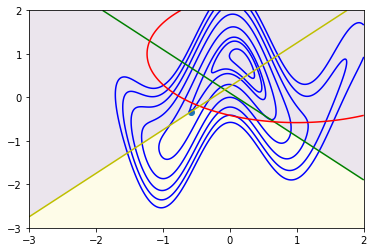

In [10]:
import numpy
plt.figure()
a = numpy.linspace(-3, 2, 1000)
b = numpy.linspace(-3, 2, 1000)

x, y = numpy.meshgrid(a, b)

f_q = lambdify((x1, x2), Q, 'numpy')
f_g1 = lambdify((x1, x2), g1, 'numpy')
f_g2 = lambdify((x1, x2), g2, 'numpy')
f_g3 = lambdify((x1, x2), g3, 'numpy')

plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)

c = plt.contour(x, y, f_q(x, y), levels=(1, 3, 4.5, 10, 20, 30, 40, 50), colors='b')
c = plt.contour(x, y, f_g1(x, y), (0,), colors='g')
c = plt.contour(x, y, f_g2(x, y), (0,), colors='r')
c = plt.contour(x, y, f_g3(x, y), (0,), colors='y')

c = plt.scatter(x_r, y_r)
plt.show(c)

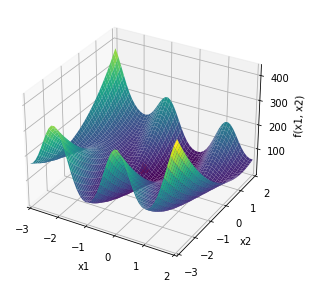

In [11]:
tmp = plot3d(Q, (x1, leftBoundaryX, rightBoundaryX), (x2, leftBoundaryY , rightBoundaryY), show=False)
delta = 0.1
tmp.extend(plot3d(Q*12, (x1, x_r-delta, x_r+delta), (x2, y_r-delta , y_r+delta), show=False, surface_color='r'))
tmp.show()
# точка там есть, но очень незаметная

**Пример.** 

Вы определили, что нужно использовать условия Каруша-Куна-Таккера для невыпуклого случая в дифференциальной форме. 

Пусть λ0=1

1) Проверьте, что найденная точка является допустимой.

2) Проверьте, что набор λ0 и соответствующих лямбд для активных ограничений неотрицательный и нетривиальный

3) Проверьте выполнение условия дополняющей нежесткости

4) Проверьте выполнение условия стационарность


In [12]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [13]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

-1.01788733268810 -1.06768894811022 5.55111512312578e-17


In [14]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12 # из-за точности вычислений

True

In [15]:
g2.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [16]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

**2) Проверьте, что набор λ0 и соответствующих лямбд для активных ограничений неотрицательный и нетривиальный**  

$-\lambda_0 \nabla Q(x^*)= \lambda_3 \nabla g_3(x^*)$  
$(\lambda_0, \lambda_3) \neq 0$ 
$\lambda_0 \geq 0$, $\lambda_3 \geq 0$

In [17]:
grad_Q = [diff(Q, x1), diff(Q, x2)]
grad_Q

[32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1), -8*x1 + 42*x2 - 40*cos(3*x1)]

In [18]:
grad_g3 = [diff(g3, x1), diff(g3, x2)]
grad_g3

[-1, 1]

In [19]:
lambda3 = symbols('lambda3')
lambda0 = symbols('lambda0')
lambda0 = 1

In [20]:
sys_str_1 = lambda0*grad_Q[0] + lambda3*grad_g3[0]
sys_str_1

-lambda3 + 32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1)

In [21]:
sys_str_2 = lambda0*grad_Q[1] + lambda3*grad_g3[1]
sys_str_2

lambda3 - 8*x1 + 42*x2 - 40*cos(3*x1)

In [22]:
from sympy import nsolve
sys_solution = sp.nsolve([sys_str_1, sys_str_2, g3], [x1, x2, lambda3], [x_r, y_r, 1.5])
#sys_solution
lambda3_res = sys_solution[2]
lambda3_res

2.15269340537639

In [23]:
print(x_r, y_r)
print(sys_solution[0], sys_solution[1])
# очередной фикс точности
x_r = sys_solution[0]
y_r = sys_solution[1]

-0.5839436663440477 -0.33394366634404765
-0.583937644430861 -0.333937644430861


**Неотрицательность**

In [24]:
lambda3_res >= 0

True

**Нетривиальность**

In [25]:
lambda3_res != 0 and lambda0 != 0

True

**3) Проверьте выполнение условия дополняющей нежесткости**  


$\lambda_3 g_3(x^*) = 0$

In [26]:
g3_value = g3.evalf(subs={x1:x_r, x2:y_r})

In [27]:
abs(lambda3_res *  g3_value - 0) < 1e-15

True

**4) Проверьте выполнение условия стационарность**

$\nabla Q(x^*) + \lambda_3^* \nabla g_3(x^*) = 0$

In [28]:
grad_Q_value = [grad_Q[0].evalf(subs={x1:x_r, x2:y_r}), grad_Q[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g3_value = [grad_g3[0].evalf(subs={x1:x_r, x2:y_r}), grad_g3[1].evalf(subs={x1:x_r, x2:y_r})]

In [29]:
abs(grad_Q_value[0] + lambda3_res * grad_g3_value[0]) < 1e-12

True

In [30]:
abs(grad_Q_value[1] + lambda3_res * grad_g3_value[1]) < 1e-12

True

In [31]:
grad_g3_value

[-1.00000000000000, 1.00000000000000]

Множество регулярно в точке в форме независимости градиентов активных ограничений. 

ТОЧКА ПОДХОДИТ!

### g1 - активное

In [32]:
import scipy.optimize as opt

# начальное приближение
x1_= 0.66
x2_= -0.55
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [33]:
def con_active1(x): # g1
    # x2 + x1 - 0.1
    return x[1]+x[0]-0.1

cons = [{'type':'eq', 'fun': con_active1}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [34]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 3.34355583865465
     jac: array([-1.4926894, -1.4931668])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-0.32836461,  0.42836461])


In [35]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

-0.32836460615160357 0.4283646061516036 3.34355583865465


In [36]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [37]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

2.77555756156289e-17 2.58191342612327 0.506729212303207


In [38]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [39]:
g2.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

False

In [40]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

False

ТОЧКА НЕ ПОДХОДИТ

### g2 - активное

In [41]:
import scipy.optimize as opt

# начальное приближение
x1_= 0.6
x2_= -0.5
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [42]:
def con_active1(x): # g2
    return -(x[0]-1)**2 - 2*(x[1]-1)**2 + 5

cons = [{'type':'eq', 'fun': con_active1}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [43]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 10.6851223260219
     jac: array([ -1.82620978, -15.56796551])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 0.6340901, -0.5598253])


In [44]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

0.6340900951424885 -0.5598253013603302 10.6851223260219


In [45]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [46]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

-0.0257352062178417 -5.22681953570628e-13 -1.44391539650282


In [47]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [48]:
g2.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [49]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

**2) Проверьте, что набор λ0 и соответствующих лямбд для активных ограничений неотрицательный и нетривиальный**  

$-\lambda_0 \nabla Q(x^*)= \lambda_2 \nabla g_2(x^*)$  
$(\lambda_0, \lambda_2) \neq 0$  
$\lambda_0 \geq 0$, $\lambda_2 \geq 0$

In [50]:
grad_Q = [diff(Q, x1), diff(Q, x2)]
grad_Q

[32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1), -8*x1 + 42*x2 - 40*cos(3*x1)]

In [51]:
grad_g2 = [diff(g2, x1), diff(g2, x2)]
grad_g2

[2 - 2*x1, 4 - 4*x2]

In [52]:
lambda2 = symbols('lambda2')
lambda0 = symbols('lambda0')
lambda0 = 1

In [53]:
sys_str_1 = lambda0*grad_Q[0] + lambda2*grad_g2[0]
sys_str_1

lambda2*(2 - 2*x1) + 32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1)

In [54]:
sys_str_2 = lambda0*grad_Q[1] + lambda2*grad_g2[1]
sys_str_2

lambda2*(4 - 4*x2) - 8*x1 + 42*x2 - 40*cos(3*x1)

In [55]:
from sympy import nsolve
sys_solution = sp.nsolve([sys_str_1, sys_str_2, g2], [x1, x2, lambda2], [x_r, y_r, 1])
#sys_solution
lambda2_res = sys_solution[2]
lambda2_res

2.49513500177943

In [56]:
print(x_r, y_r)
print(sys_solution[0], sys_solution[1])
# очередной фикс точности
x_r = sys_solution[0]
y_r = sys_solution[1]

0.6340900951424885 -0.5598253013603302
0.634090099735732 -0.559825301898997


**Неотрицательность**

In [57]:
lambda2_res >= 0

True

**Нетривиальность**

In [58]:
lambda2_res != 0 and lambda0 != 0

True

**3) Проверьте выполнение условия дополняющей нежесткости**  


$\lambda_2 g_2(x^*) = 0$

In [59]:
g2_value = g2.evalf(subs={x1:x_r, x2:y_r})

In [60]:
abs(lambda2_res *  g2_value - 0) < 1e-15

True

**4) Проверьте выполнение условия стационарность**

$\nabla Q(x^*) + \lambda_2^* \nabla g_2(x^*) = 0$

In [61]:
grad_Q_value = [grad_Q[0].evalf(subs={x1:x_r, x2:y_r}), grad_Q[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g2_value = [grad_g2[0].evalf(subs={x1:x_r, x2:y_r}), grad_g2[1].evalf(subs={x1:x_r, x2:y_r})]

In [62]:
abs(grad_Q_value[0] + lambda2_res * grad_g2_value[0]) < 1e-12

True

In [63]:
abs(grad_Q_value[1] + lambda2_res * grad_g2_value[1]) < 1e-12

True

C:\Users\veter\AppData\Local\Temp/ipykernel_6328/1539729535.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)


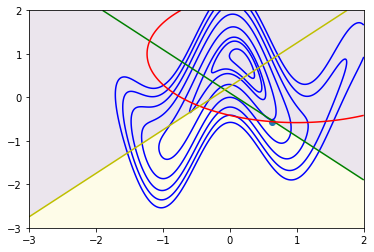

In [64]:
plt.figure()
a = numpy.linspace(-3, 2, 1000)
b = numpy.linspace(-3, 2, 1000)

x, y = numpy.meshgrid(a, b)

f_q = lambdify((x1, x2), Q, 'numpy')
f_g1 = lambdify((x1, x2), g1, 'numpy')
f_g2 = lambdify((x1, x2), g2, 'numpy')
f_g3 = lambdify((x1, x2), g3, 'numpy')

plt.pcolormesh(x, y, (f_g1(x, y) <= 0) & (f_g2(x, y) <= 0) & (f_g3(x, y) <= 0), alpha=0.1)

c = plt.contour(x, y, f_q(x, y), levels=(1, 3, 4.5, 10, 20, 30, 40, 50), colors='b')
c = plt.contour(x, y, f_g1(x, y), (0,), colors='g')
c = plt.contour(x, y, f_g2(x, y), (0,), colors='r')
c = plt.contour(x, y, f_g3(x, y), (0,), colors='y')

c = plt.scatter(x_r, y_r)
plt.show(c)

In [65]:
grad_g2_value

[0.731819800528535, 6.23930120759599]

Множество регулярно в точке в форме независимости градиентов активных ограничений. 

ТОЧКА ПОДХОДИТ

### g3 и g2 - активные

In [66]:
import scipy.optimize as opt

# начальное приближение
x1_= -0.46
x2_= -0.2
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [67]:
def con_active1(x): # g3
    return x[1] - x[0] - 0.25

def con_active2(x): # g2
    return -(x[0]-1)**2 - 2*(x[1]-1)**2 + 5

cons = [{'type':'eq', 'fun': con_active1}, {'type':'eq', 'fun': con_active2}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [68]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 6.02013300603302
     jac: array([ 35.7657938 , -13.37139928])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-0.45227072, -0.20227072])


In [69]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

-0.4522707184101488 -0.20227071841016564 6.02013300603302


In [70]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [71]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

-0.754541436820314 -2.44521367081675e-10 -1.68198788230711e-14


In [72]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [73]:
g2.evalf(subs={x1:x_r, x2:y_r})<= 1e-12

True

In [74]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

**2) Проверьте, что набор λ0 и соответствующих лямбд для активных ограничений неотрицательный и нетривиальный**  

$-\lambda_0 \nabla Q(x^*)= \lambda_2 \nabla g_2(x^*) + \lambda_3 \nabla g_3(x^*)$  
$(\lambda_0, \lambda_2, \lambda_3) \neq 0$  
$\lambda_0 \geq 0$, $\lambda_2, \lambda_3\geq 0$

In [75]:
grad_Q = [diff(Q, x1), diff(Q, x2)]
grad_Q

[32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1), -8*x1 + 42*x2 - 40*cos(3*x1)]

In [76]:
grad_g2 = [diff(g2, x1), diff(g2, x2)]
grad_g2

[2 - 2*x1, 4 - 4*x2]

In [77]:
grad_g3 = [diff(g3, x1), diff(g3, x2)]
grad_g3

[-1, 1]

In [78]:
lambda2 = symbols('lambda2')
lambda3 = symbols('lambda3')
lambda0 = symbols('lambda0')
lambda0 = 1

In [79]:
sys_str_1 = lambda0*grad_Q[0] + lambda2*grad_g2[0] + lambda3*grad_g3[0]
sys_str_1

lambda2*(2 - 2*x1) - lambda3 + 32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1)

In [80]:
sys_str_2 = lambda0*grad_Q[1] + lambda2*grad_g2[1] + lambda3*grad_g3[1]
sys_str_2

lambda2*(4 - 4*x2) + lambda3 - 8*x1 + 42*x2 - 40*cos(3*x1)

In [81]:
from sympy import nsolve
sys_solution = sp.nsolve([sys_str_1, sys_str_2, g2, g3], [x1, x2, lambda2, lambda3], [x_r, y_r, 1, 1])
#sys_solution
lambda2_res = sys_solution[2]
lambda2_res

-2.90322561553856

In [82]:
lambda3_res = sys_solution[3]
lambda3_res

27.3332521338961

In [83]:
print(x_r, y_r)
print(sys_solution[0], sys_solution[1])
# очередной фикс точности
x_r = sys_solution[0]
y_r = sys_solution[1]

-0.4522707184101488 -0.20227071841016564
-0.452270718378459 -0.202270718378459


**Неотрицательность**

In [84]:
lambda2_res >= 0 and lambda3_res >= 0

False

In [85]:
grad_g2_value = [grad_g2[0].evalf(subs={x1:x_r, x2:y_r}), grad_g2[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g3_value = [grad_g3[0].evalf(subs={x1:x_r, x2:y_r}), grad_g3[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g2_value

[2.90454143675692, 4.80908287351384]

In [86]:
grad_g3_value

[-1.00000000000000, 1.00000000000000]

Множество регулярно в точке в форме независимости градиентов.

ТОЧКА НЕ ПОДХОДИТ

### g2 и g1 - активные

In [87]:
import scipy.optimize as opt

# начальное приближение
x1_= 0.66
x2_= -0.55
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [88]:
def con_active1(x): # g1
    return x[1]+x[0]-0.1

def con_active2(x): # g2
    return -(x[0]-1)**2 - 2*(x[1]-1)**2 + 5

cons = [{'type':'eq', 'fun': con_active1}, {'type':'eq', 'fun': con_active2}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [89]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 10.8303306364269
     jac: array([  8.53918624, -12.69994402])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 0.66308838, -0.56308838])


In [90]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

0.6630883809204748 -0.5630883809204749 10.8303306364269


In [91]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [92]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

-2.77555756156289e-17 -1.22079701096968e-8 -1.47617676184095


In [93]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [94]:
g2.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [95]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

**2) Проверьте, что набор λ0 и соответствующих лямбд для активных ограничений неотрицательный и нетривиальный**  

$-\lambda_0 \nabla Q(x^*)= \lambda_1 \nabla g_1(x^*) + \lambda_2 \nabla g_2(x^*)$  
$(\lambda_0, \lambda_1, \lambda_2) \neq 0$   
$\lambda_0 \geq 0$, $ \lambda_1 \geq 0$, $\lambda_2 \geq 0$

In [96]:
grad_Q = [diff(Q, x1), diff(Q, x2)]
grad_Q

[32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1), -8*x1 + 42*x2 - 40*cos(3*x1)]

In [97]:
grad_g2 = [diff(g2, x1), diff(g2, x2)]
grad_g2

[2 - 2*x1, 4 - 4*x2]

In [98]:
grad_g1 = [diff(g1, x1), diff(g1, x2)]
grad_g1

[1, 1]

In [99]:
lambda2 = symbols('lambda2')
lambda1 = symbols('lambda1')
lambda0 = symbols('lambda0')
lambda0 = 1

In [100]:
sys_str_1 = lambda0*grad_Q[0] + lambda2*grad_g2[0] + lambda1*grad_g1[0]
sys_str_1

lambda1 + lambda2*(2 - 2*x1) + 32*x1 - 8*x2 - 120*(-x2 + cos(3*x1))*sin(3*x1)

In [101]:
sys_str_2 = lambda0*grad_Q[1] + lambda2*grad_g2[1] + lambda1*grad_g1[1]
sys_str_2

lambda1 + lambda2*(4 - 4*x2) - 8*x1 + 42*x2 - 40*cos(3*x1)

In [102]:
from sympy import nsolve
sys_solution = sp.nsolve([sys_str_1, sys_str_2, g1, g2], [x1, x2, lambda1, lambda2], [x_r, y_r, 1, 1])
#sys_solution
lambda1_res = sys_solution[2]
lambda1_res

-11.1046289255347

In [103]:
lambda2_res = sys_solution[3]
lambda2_res

3.80729805334254

In [104]:
print(x_r, y_r)
print(sys_solution[0], sys_solution[1])
# очередной фикс точности
x_r = sys_solution[0]
y_r = sys_solution[1]

0.6630883809204748 -0.5630883809204749
0.663088378732090 -0.563088378732090


**Неотрицательность**

In [105]:
lambda1_res >= 0 and lambda2_res >=0

False

In [106]:
grad_g2_value = [grad_g2[0].evalf(subs={x1:x_r, x2:y_r}), grad_g2[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g1_value = [grad_g1[0].evalf(subs={x1:x_r, x2:y_r}), grad_g1[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g2_value

[0.673823242535819, 6.25235351492836]

In [107]:
grad_g1_value

[1.00000000000000, 1.00000000000000]

Множество регулярно в точке в форме независимости градиентов.

ТОЧКА НЕ ПОДХОДИТ

### g3 и g1 - активные

In [108]:
import scipy.optimize as opt

# начальное приближение
x1_= -0.075
x2_= 0.17
initial_guess = np.array([x1_,x2_])

Зададим необходимые функции в python: целевую функцию и функции активных ограничений

In [109]:
def con_active1(x): # g1
    return x[1]+x[0]-0.1

def con_active2(x): # g3
    return x[1] - x[0] - 0.25

cons = [{'type':'eq', 'fun': con_active1}, {'type':'eq', 'fun': con_active2}] # массив активных ограничений

def func(x): # Q
    return 20 * (cos(3*x[0]) - x[1])**2 + (x[1] - 4*x[0])**2

Оптимизируем с помощью функции minimize и распечатаем результат

In [110]:
result = opt.minimize(func, initial_guess, constraints=cons)
print(result)

     fun: 13.0190372740442
     jac: array([ 17.61269653, -31.04176402])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.075,  0.175])


In [111]:
x_r = result['x'][0]
y_r = result['x'][1]
q_r = Q.evalf(subs={x1:x_r, x2:y_r})
print(x_r, y_r, q_r)

-0.07500000000000001 0.17500000000000002 13.0190372740442


In [112]:
lambda0 = symbols('lambda0')
lambda0 = 0

**1) Проверьте, что найденная точка является допустимой.**  
$g_1(x^*)\leq0$  
$g_2(x^*)\leq0$   
$g_3(x^*)\leq0$

In [113]:
print(g1.evalf(subs={x1:x_r, x2:y_r}), g2.evalf(subs={x1:x_r, x2:y_r}), g3.evalf(subs={x1:x_r, x2:y_r}))

0.e-126 2.48312500000000 2.77555756156289e-17


In [114]:
g1.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [115]:
g2.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

False

In [116]:
g3.evalf(subs={x1:x_r, x2:y_r}) <= 1e-12

True

In [117]:
grad_g3_value = [grad_g3[0].evalf(subs={x1:x_r, x2:y_r}), grad_g3[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g1_value = [grad_g1[0].evalf(subs={x1:x_r, x2:y_r}), grad_g1[1].evalf(subs={x1:x_r, x2:y_r})]
grad_g3_value

[-1.00000000000000, 1.00000000000000]

In [118]:
grad_g1_value

[1.00000000000000, 1.00000000000000]

Множество регулярно в точке в форме независимости градиентов.

ТОЧКА НЕ ПОДХОДИТ

**Вывод:**   
В результате перебора активных ограничений задачи были найдены локальные минимумы:  
$X=(-0.5839, -0.3339)$, $Q=4.48100$  
$X=(0.6341, -0.5598)$, $Q=10.6851$   
Найденные точки удовлетворяют условиям ККТ.   
По значению функции точка $X=(-0.5839, -0.3339)$, $Q=4.48100$ - глобальный минимум